# Bike Sharing

### Goal: Perform exploratory data analysis , create visulizations, and analyze bike sharing data from Washington DC

*Disclaimer: Credit to UC Berkeley Data100 Fall 2019 staff for assignment prompt and code outline

## Imports

In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import matplotlib.patches as mpatches 


from IPython.display import display, Latex, Markdown

import warnings
warnings.simplefilter(action='ignore')

## Loading Bike Sharing Data

In [2]:
bikeshare_df = pd.read_csv('data/bikeshare.csv')
bikeshare_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
bikeshare_df.shape

(17379, 17)

## 0: Examining the Data


### 0a) Granularity of the data
Each row represents an hour of each day of bike riding data over a period of 2 years.

### 0b) Limitations of the data
Some limitations of using this data are that the duration of the rental is unknown and the distance covered by each person while renting the bike is also unknown. Two addititonal categories that can be collected to address some of these limitations are the name of the start location along with start time and the name of the end location for the rental along with end time.

## 1: Data Preparation

### 1a) Decoding holiday, weekday, workingday, and weathersit fields

In [4]:
#Converting to yes and no
bikeshare_df['holiday'] = bikeshare_df['holiday'].replace({1: 'yes', 0: 'no'})

#Using a 3-letter label instead of current numerical values
bikeshare_df['weekday'] = bikeshare_df['weekday'].replace({0: 'Sun', 1: 'Mon',2: 'Tue',3: 'Wed',
                                           4: 'Thu',5: 'Fri',6: 'Sat',7: 'Sun'})
#Converting to yes and no
bikeshare_df['workingday'] = bikeshare_df['workingday'].replace({1: 'yes', 0: 'no'})

#Replacing each value with Clear, Mist, Light, or Heavy (Referencing humidity column to determine)
bikeshare_df['weathersit'] = bikeshare_df['weathersit'].replace({1: 'Clear', 2: 'Mist',3: 'Light',4: 'Heavy'})

bikeshare_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


### 1b) Holidays

In [6]:
#Number of entries in the data that correspond to holidays
num_holidays = (bikeshare_df['holiday'] == 'yes').sum()
num_holidays

500

### 1c) Computing daily total counts

In [7]:
indexed = bikeshare_df.set_index('dteday')
daily_counts = indexed[['casual', 'registered','workingday']]
daily_counts = daily_counts.groupby('dteday').agg({'casual' : np.sum, 'registered' : np.sum,
                                                   'workingday':'first'})
daily_counts

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
...,...,...,...
2012-12-27,247,1867,yes
2012-12-28,644,2451,yes
2012-12-29,159,1182,no


## 2: Exploring the Distribution of Riders
Comparing the distribution of the daily counts of casual and registered riders.

### 2a) Distribution comparison of casual vs registered Riders

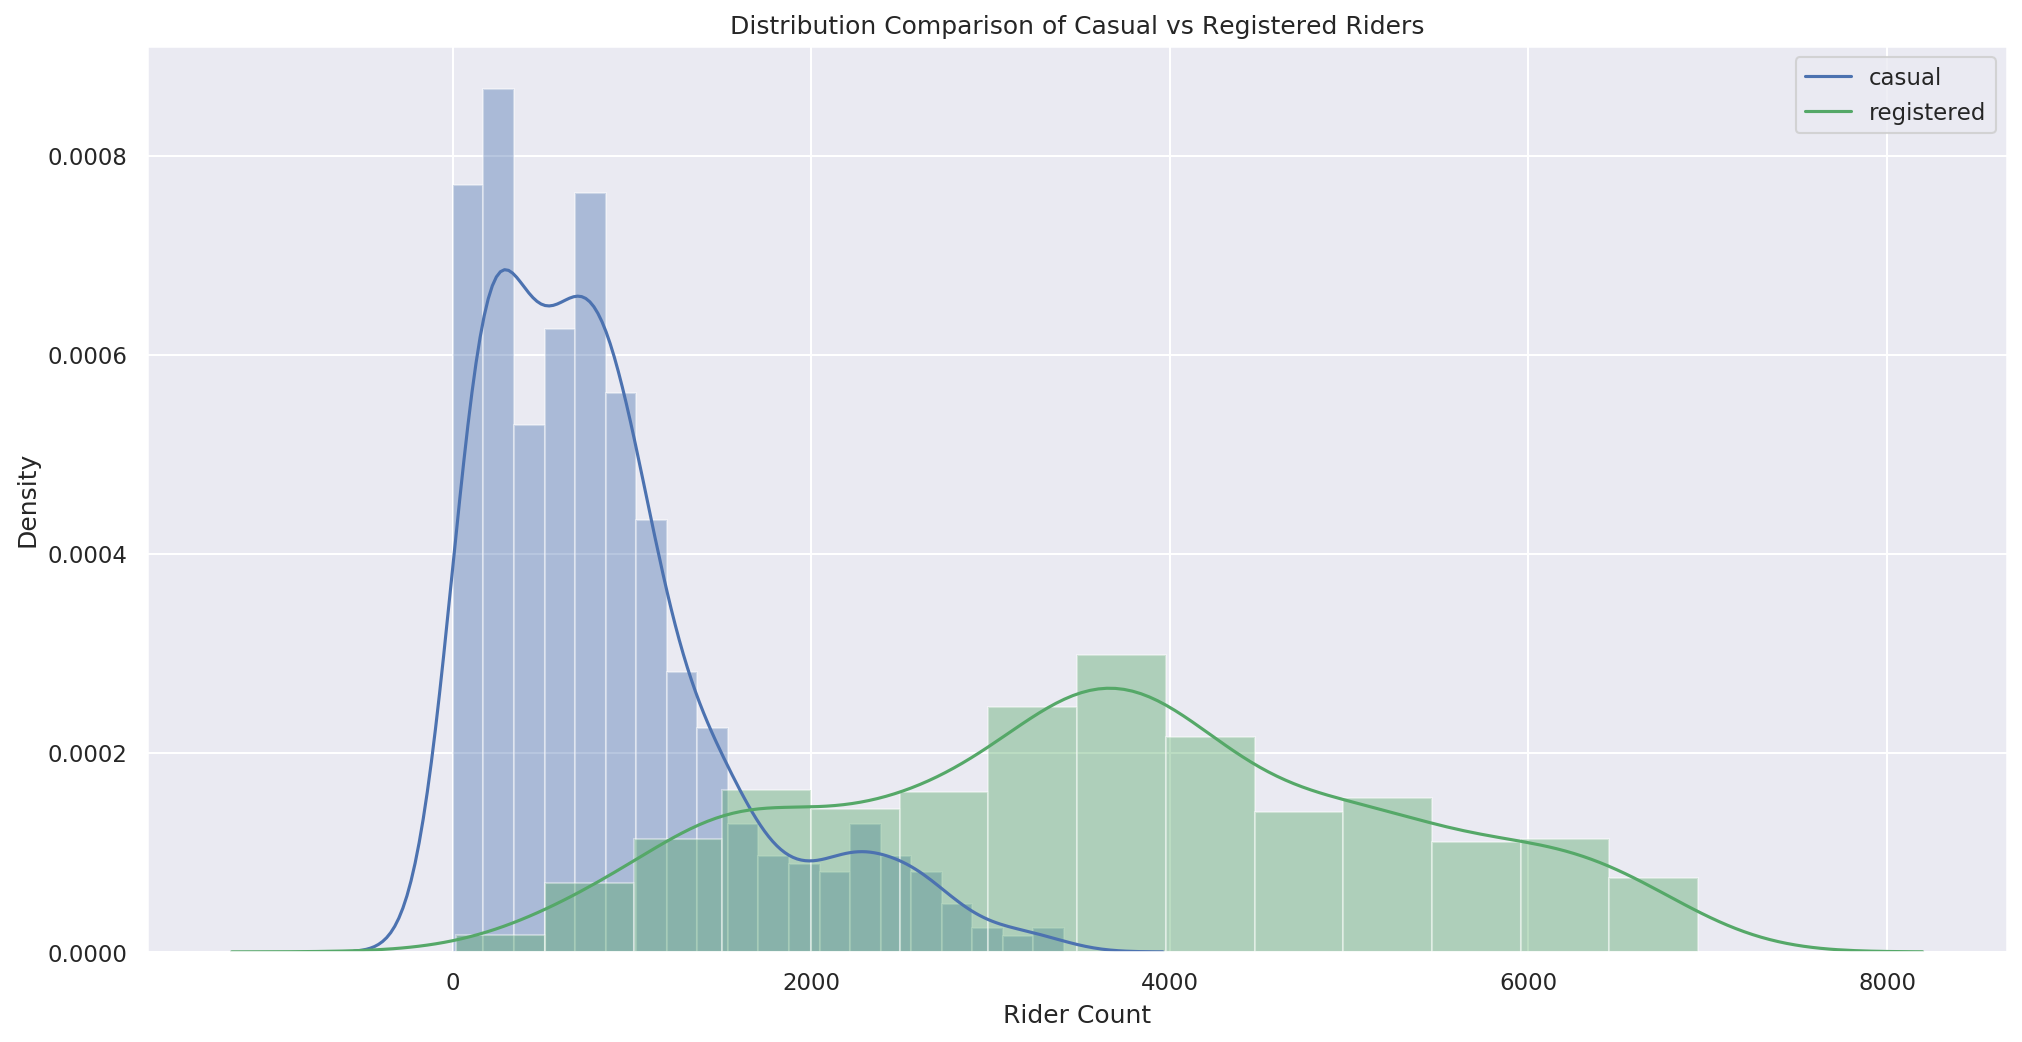

In [8]:
sns.distplot(daily_counts['casual'],color="b")
sns.distplot(daily_counts['registered'],color="g")

plt.title('Distribution Comparison of Casual vs Registered Riders')
plt.xlabel('Rider Count')
plt.ylabel('Density')
plt.legend(['casual','registered'])




### 2a) Comparison of casual vs registered riders on working & non-working days

Text(0.5, 1, 'Comparison of Casual vs Registered Riders on Working and Non-working Days')

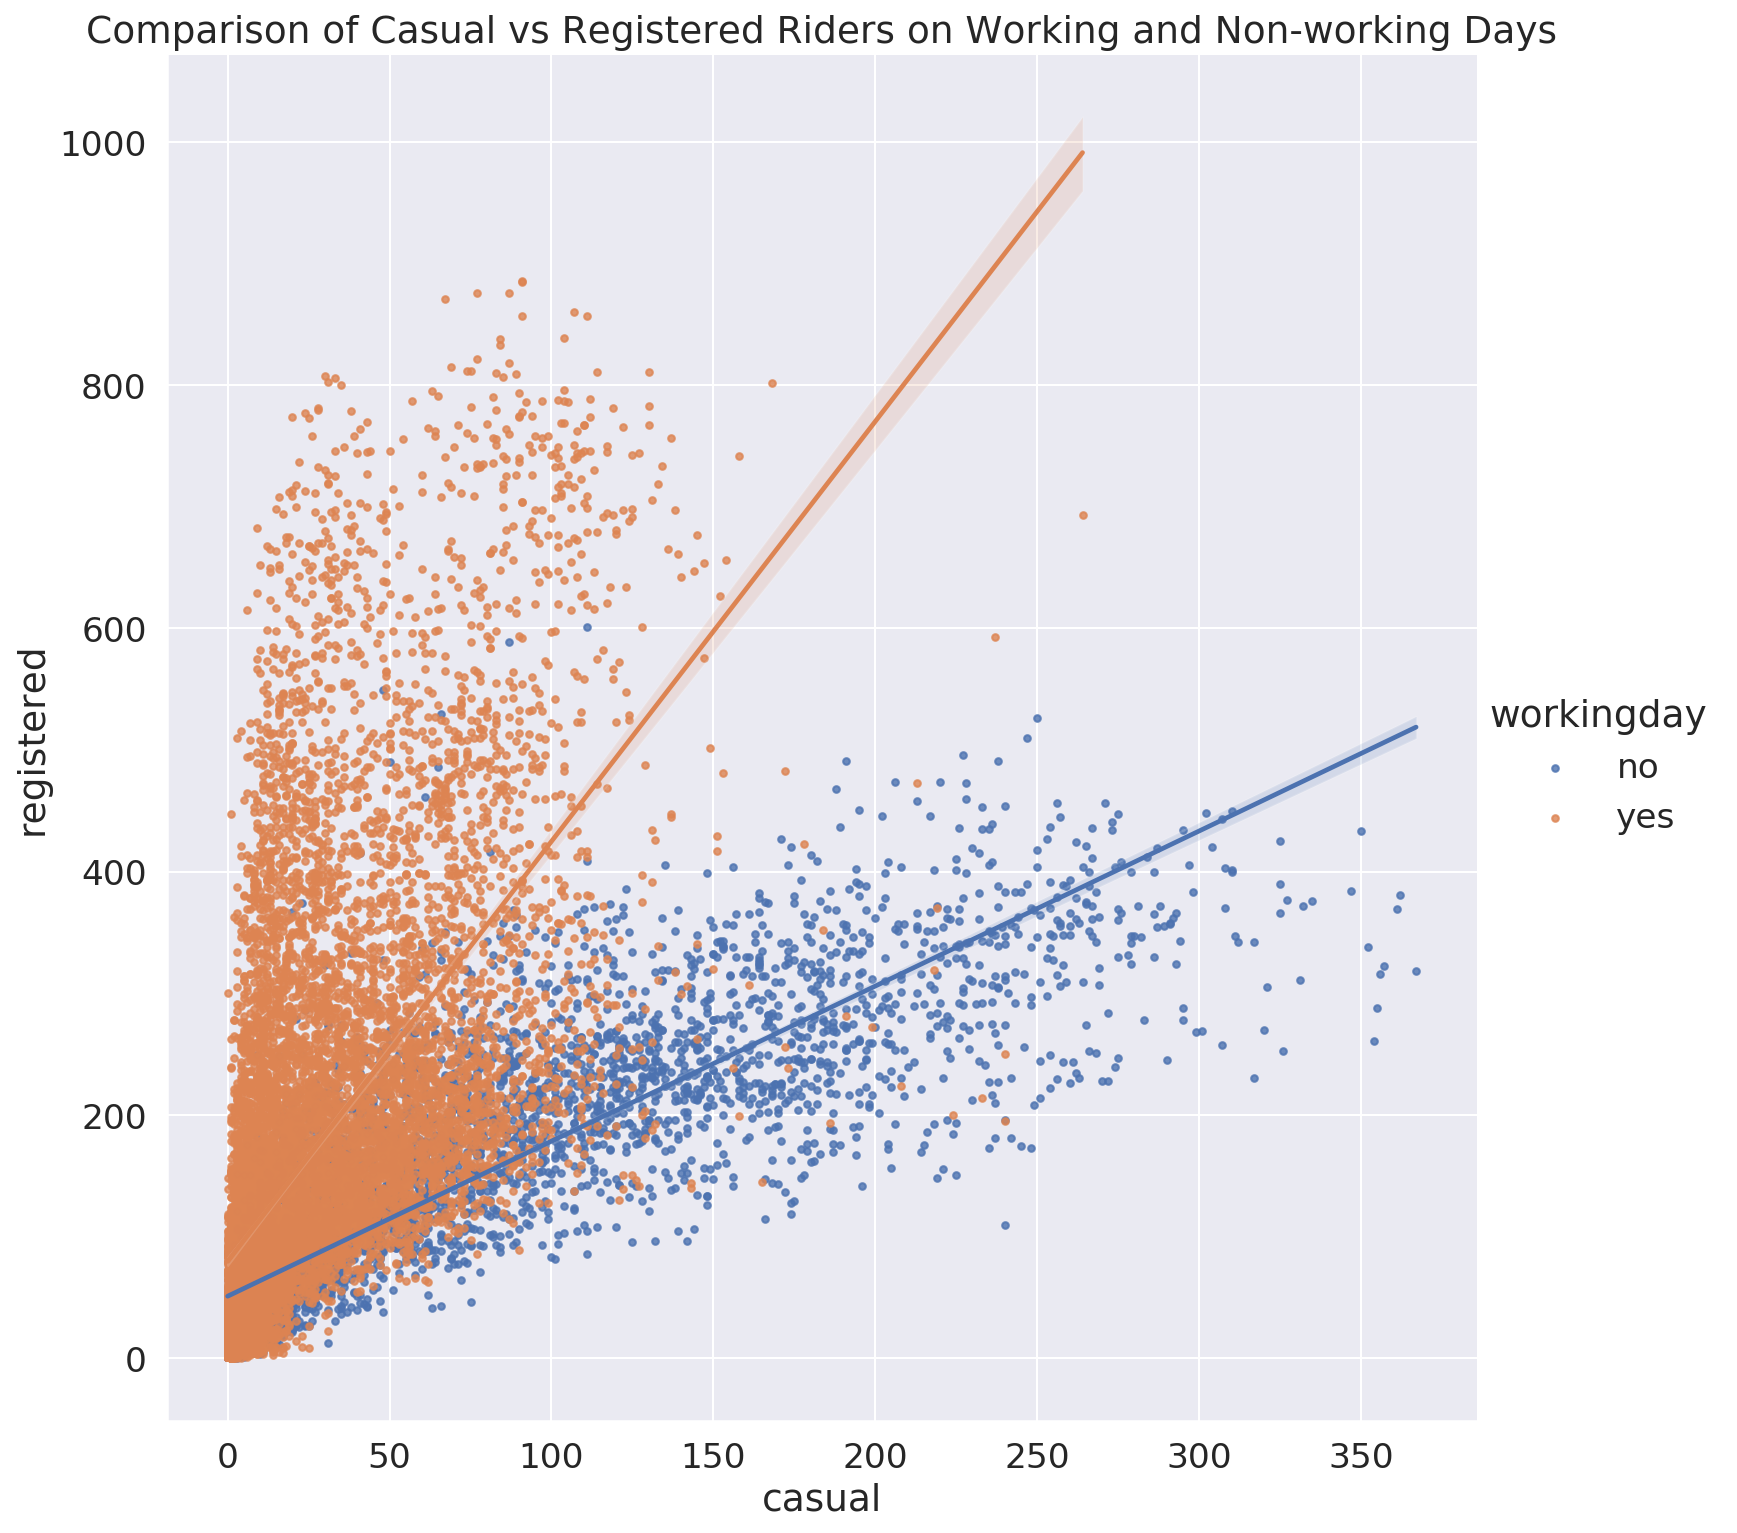

In [9]:
sns.set(font_scale=1.5)
sns.lmplot(x="casual", y="registered", hue="workingday",height=10, data=bikeshare_df, scatter_kws={'s':10},fit_reg=True)
plt.title("Comparison of Casual vs Registered Riders on Working and Non-working Days")

The scatter plot suggests that there is a positive linear relationship between registered riders and riding on a workingday and a positive linear relationship between casual riders and riding on a non-working day.

## 3: Visualization

### 3a) Bivariate kernel density plot

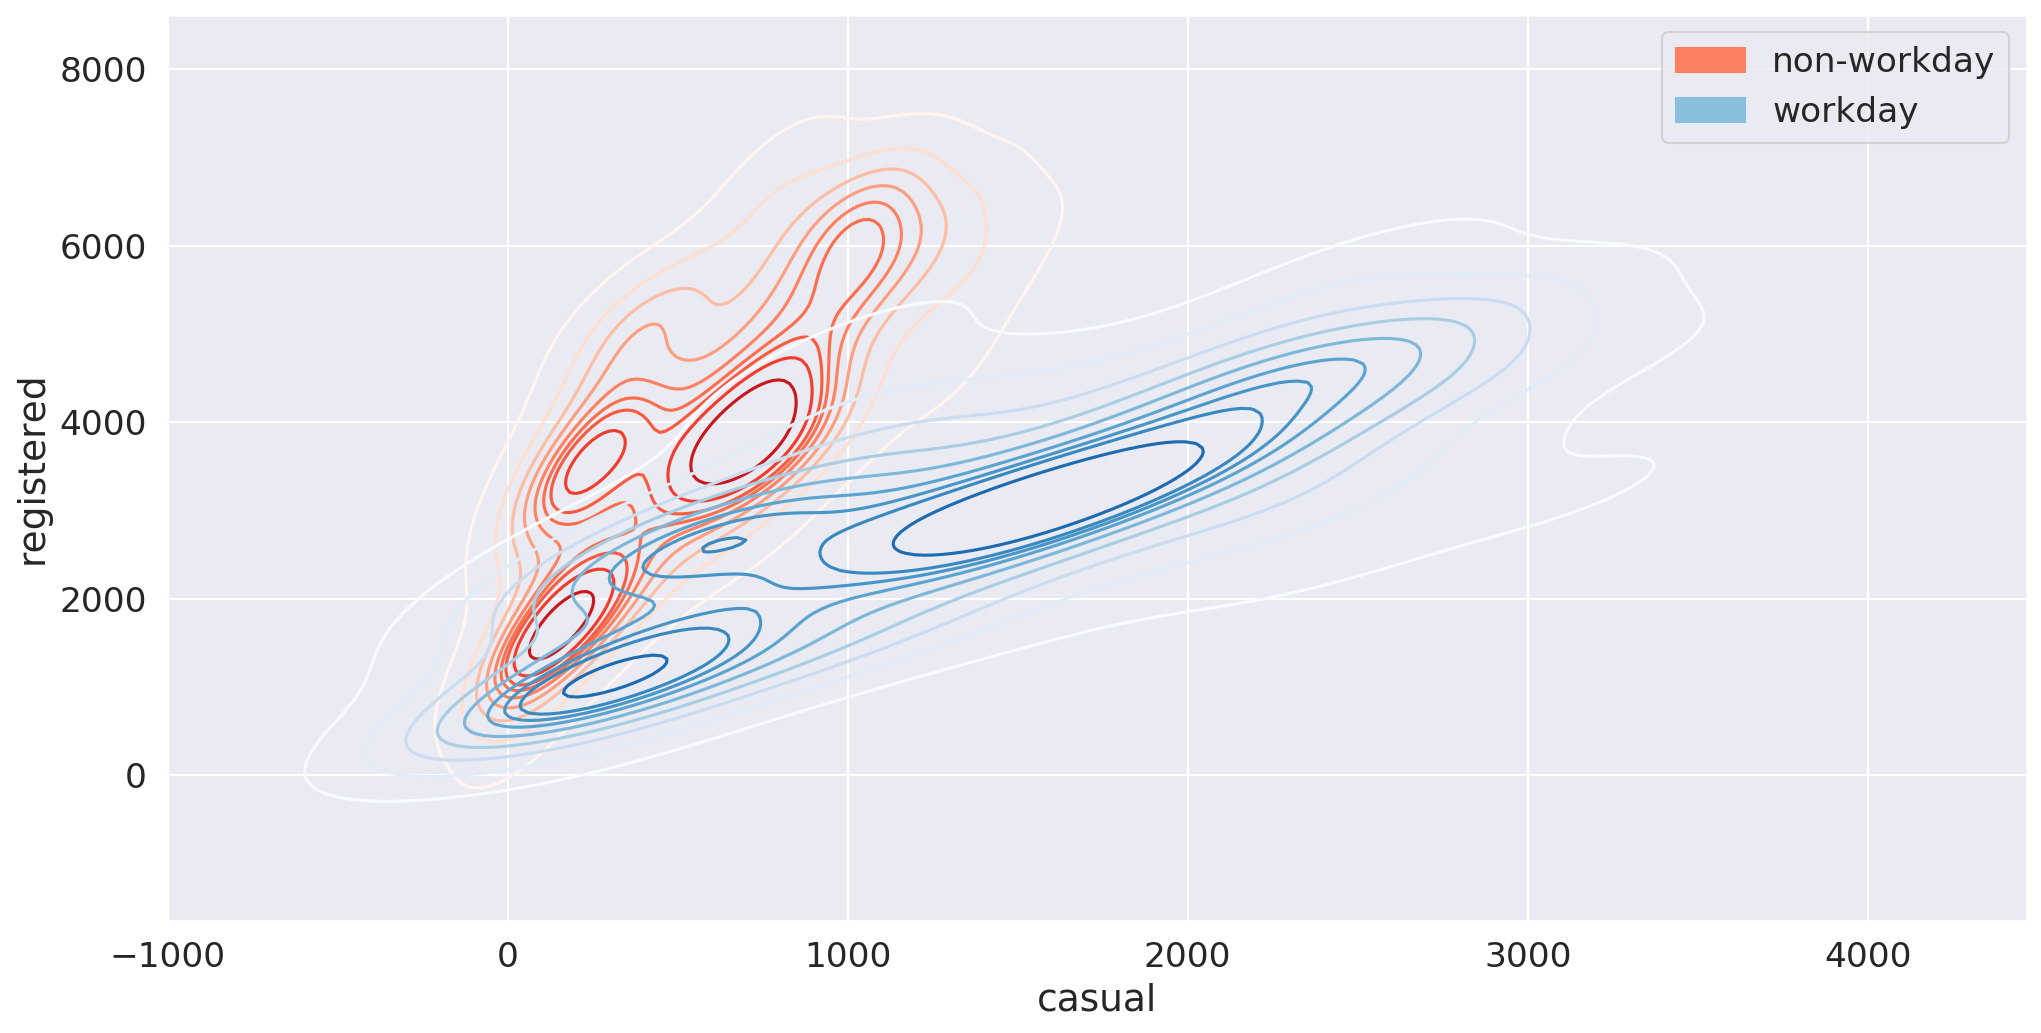

In [10]:
#Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = [daily_counts['workingday'] == 'yes']

#Bivariate KDE 2 inputs: daily counts for casual and registered riders on workdays
casual_workday = daily_counts.loc[daily_counts.workingday == 'yes']['casual']
registered_workday = daily_counts.loc[daily_counts.workingday == 'yes']['registered']

#Plot the bivariate KDE for weekday rides
ax = sns.kdeplot(casual_workday, registered_workday,
                 cmap="Reds", shade=False, shade_lowest=False)

#Repeat the same steps above but for rows corresponding to non-workingdays
casual_non_workday = daily_counts.loc[daily_counts.workingday == 'no']['casual']
registered_non_workday = daily_counts.loc[daily_counts.workingday == 'no']['registered']

#Plot the bivariate KDE for non-workingday rides
ax = sns.kdeplot(casual_non_workday, registered_non_workday,
                 cmap="Blues", shade=False, shade_lowest=False)


r = sns.color_palette("Reds")[2]
b = sns.color_palette("Blues")[2]

red_patch = mpatches.Patch(color=r, label='non-workday')
blue_patch = mpatches.Patch(color=b, label='workday')

plt.legend(handles=[red_patch,blue_patch])
plt.show()

Unlike the scatter plot, the contour plot allows us to see how the value of workdays changes as a function of casual riders and registered riders and also see how the value of non-workingdays changes as a function of casual riders and registered riders. Another detail that can now be easily identified from this countour plot is where the "high" (more data points) and "low" (areas with fewer data points) regions are for both non-workday and workday rides. Because there is a large amount of variance in our data, the data points bunch up and make it difficult to visualize details. Now with a contour plot,there are concentrated high density regions and thus a more effective means to visualize the data points relating to workday and non-workday rides. In addition, the contour plot allows for the display of the relative frequency of the weekday and non-weekday data. The contour lines that are close together indicate a high concentration of events (high concentration of casual/registered riders for nonworkdays and workdays). With the contour plot, we can also more easily view clustering of weekday and non-weekday data around the axes.

## 4: Joint Plot

### 4a) KDE contours of casual vs registered rider count

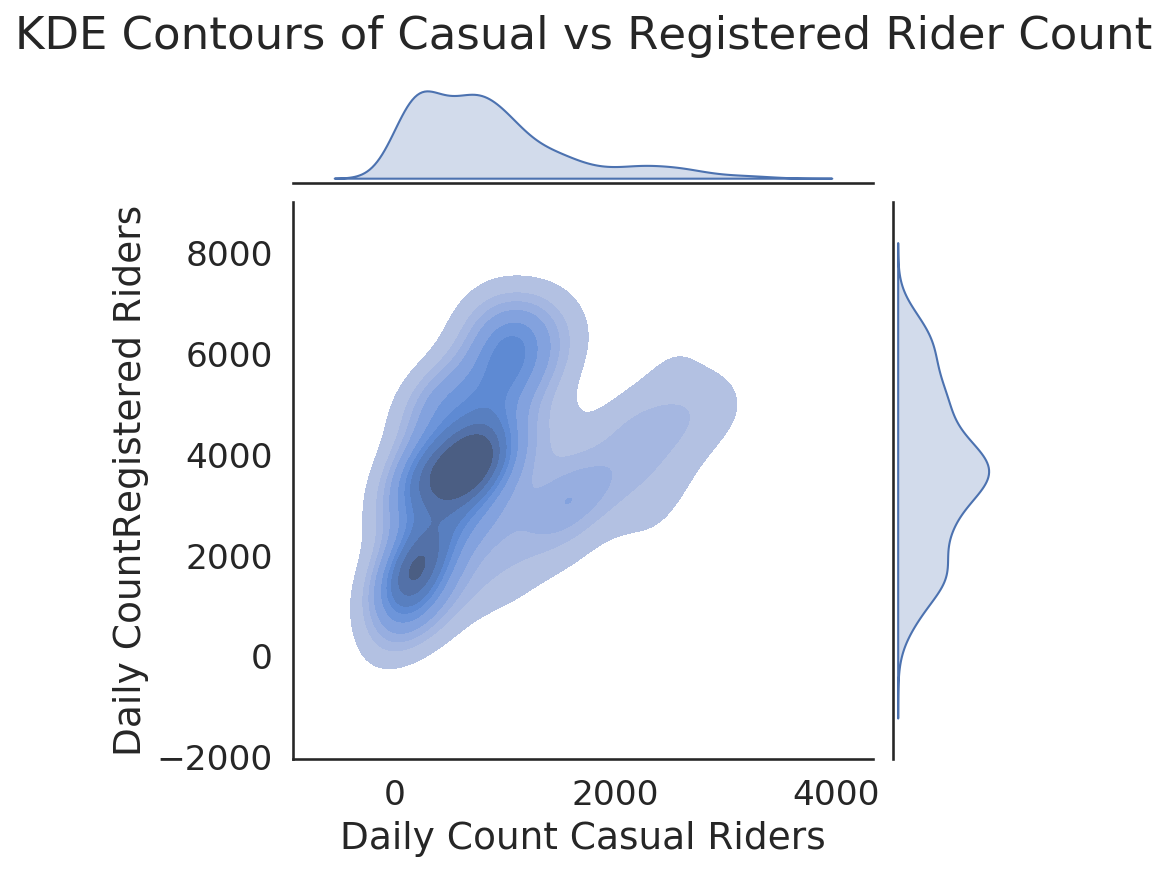

In [11]:
with sns.axes_style('white'):
    s = sns.jointplot(daily_counts['casual'], daily_counts['registered'], daily_counts, kind='kde',fill=True)
    s.set_axis_labels('Daily Count Casual Riders','Daily CountRegistered Riders')
    plt.suptitle('KDE Contours of Casual vs Registered Rider Count')
    plt.subplots_adjust(top=0.9)

## 5: Understanding Daily Patterns

### 5a) Behavior of riders 

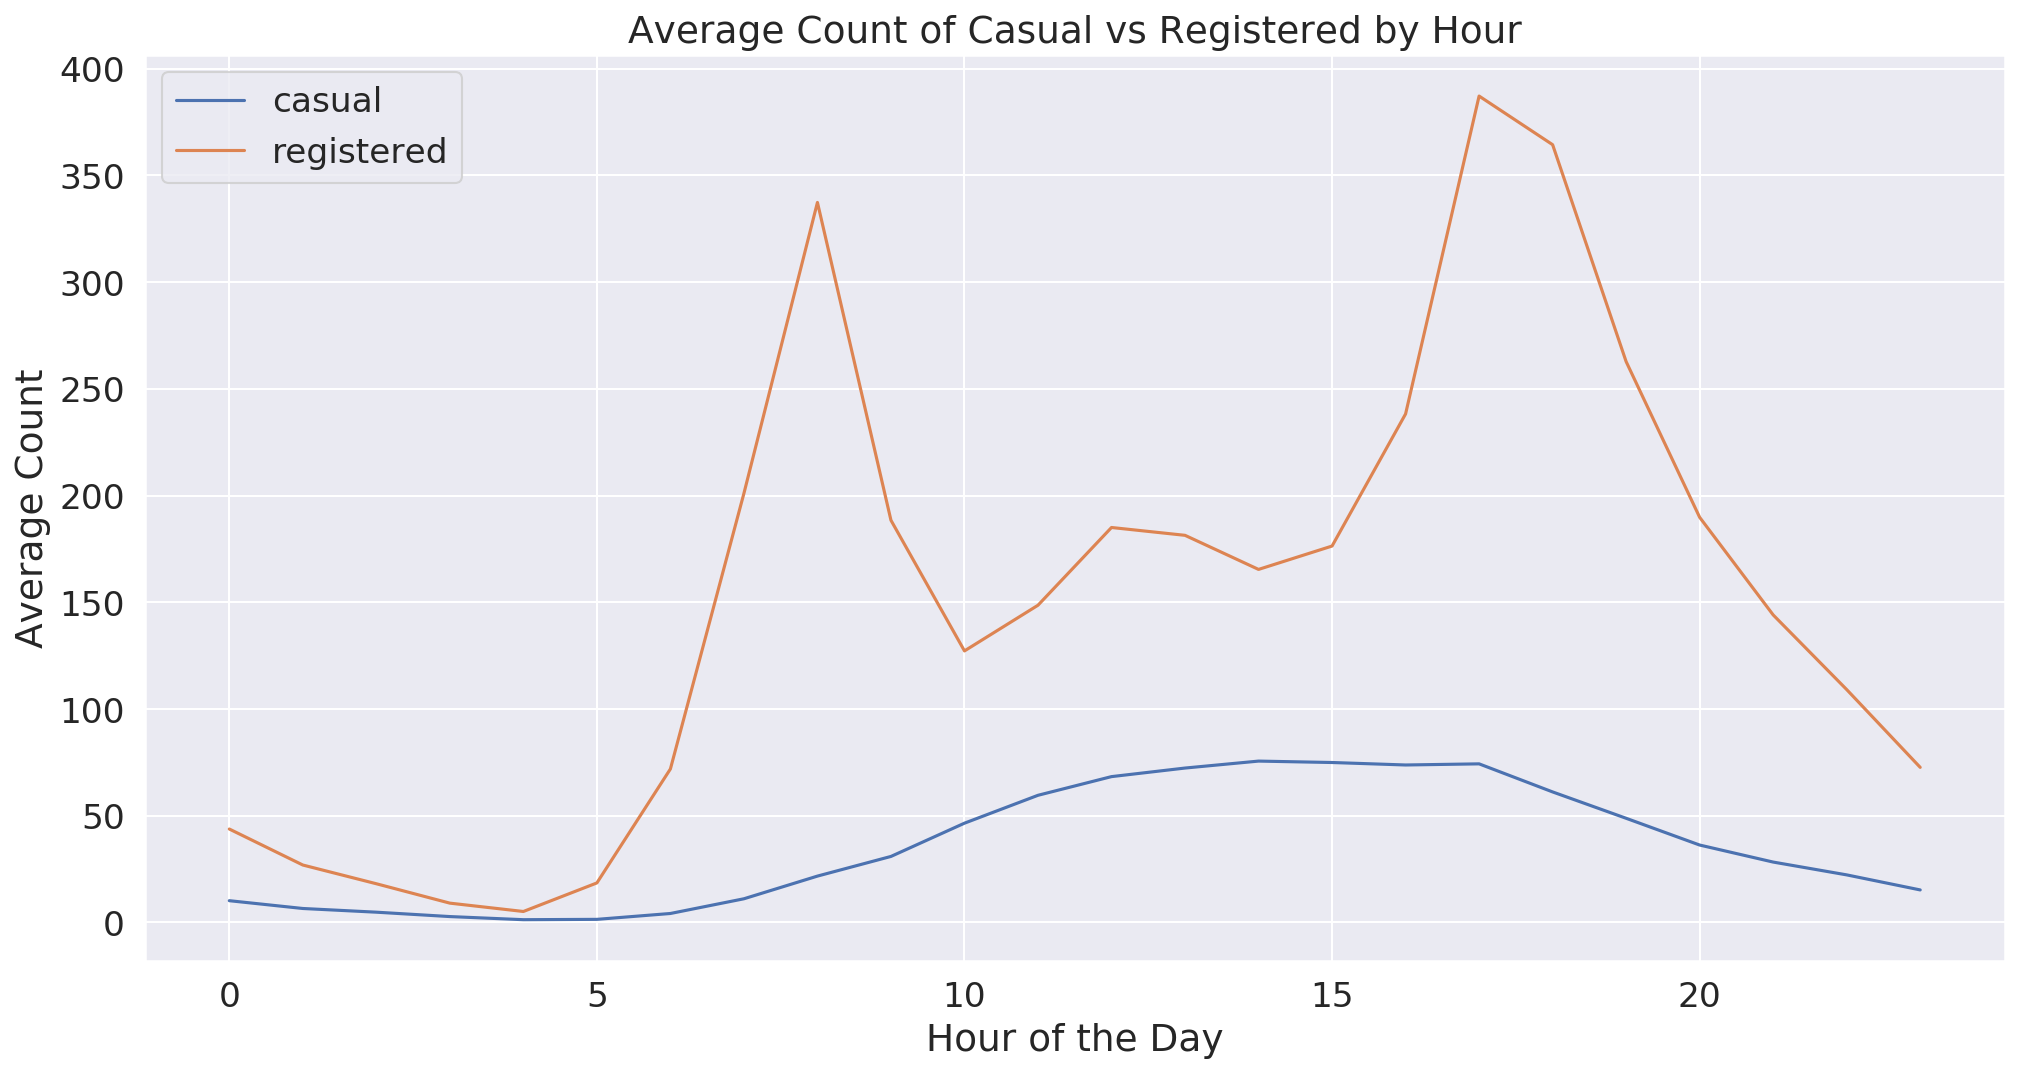

In [12]:
hourly = bikeshare_df.groupby('hr').agg(np.mean)

sns.lineplot(x = hourly.index, y = hourly['casual'], label = 'casual')
sns.lineplot(x = hourly.index, y = hourly['registered'], label = 'registered')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count of Casual vs Registered by Hour')
plt.legend(loc='upper left')
plt.show()

From the plot, we can see that there is spike in the average of registered riders in the morning (around 8am) and in the afternoon (around 5pm). The morning peak may indicate the time when registered riders are commuting to work and the afternoon peak may indicate the rush hour period where riders are leaving work. 
On the other hand, the distribution for casual riders is much more stable. Casual riders ride bikes throughout the day, with only slight peak in the middle of the afternoon.

## 6: Exploring Ride Sharing and Weather

### 6a) Proportion of casual riders out of all riders for each record

In [13]:
bikeshare_df['prop_casual'] = bikeshare_df['casual'] / (bikeshare_df['casual'] + bikeshare_df['registered'])
bikeshare_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


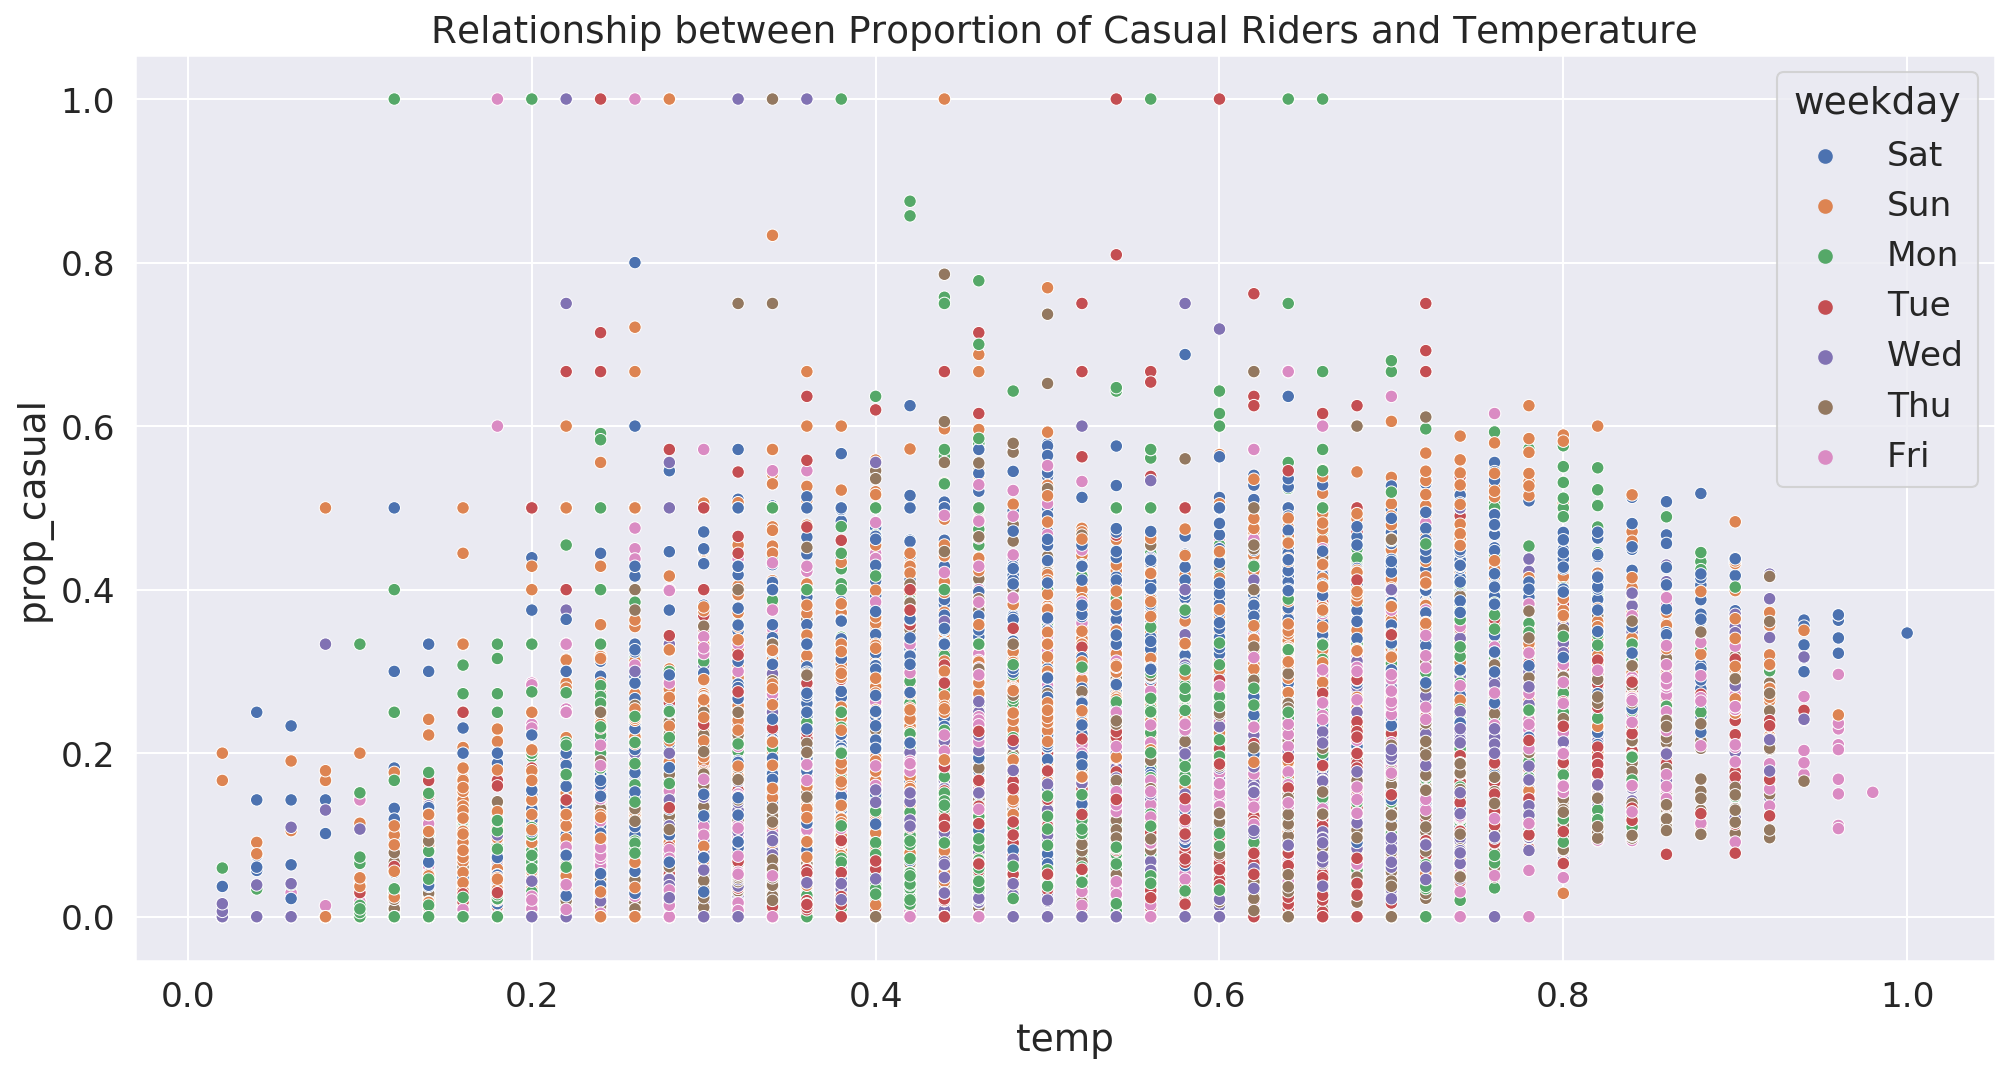

In [16]:
sns.scatterplot(data=bikeshare_df, x="temp", y="prop_casual", hue="weekday")
plt.title('Relationship between Proportion of Casual Riders and Temperature');

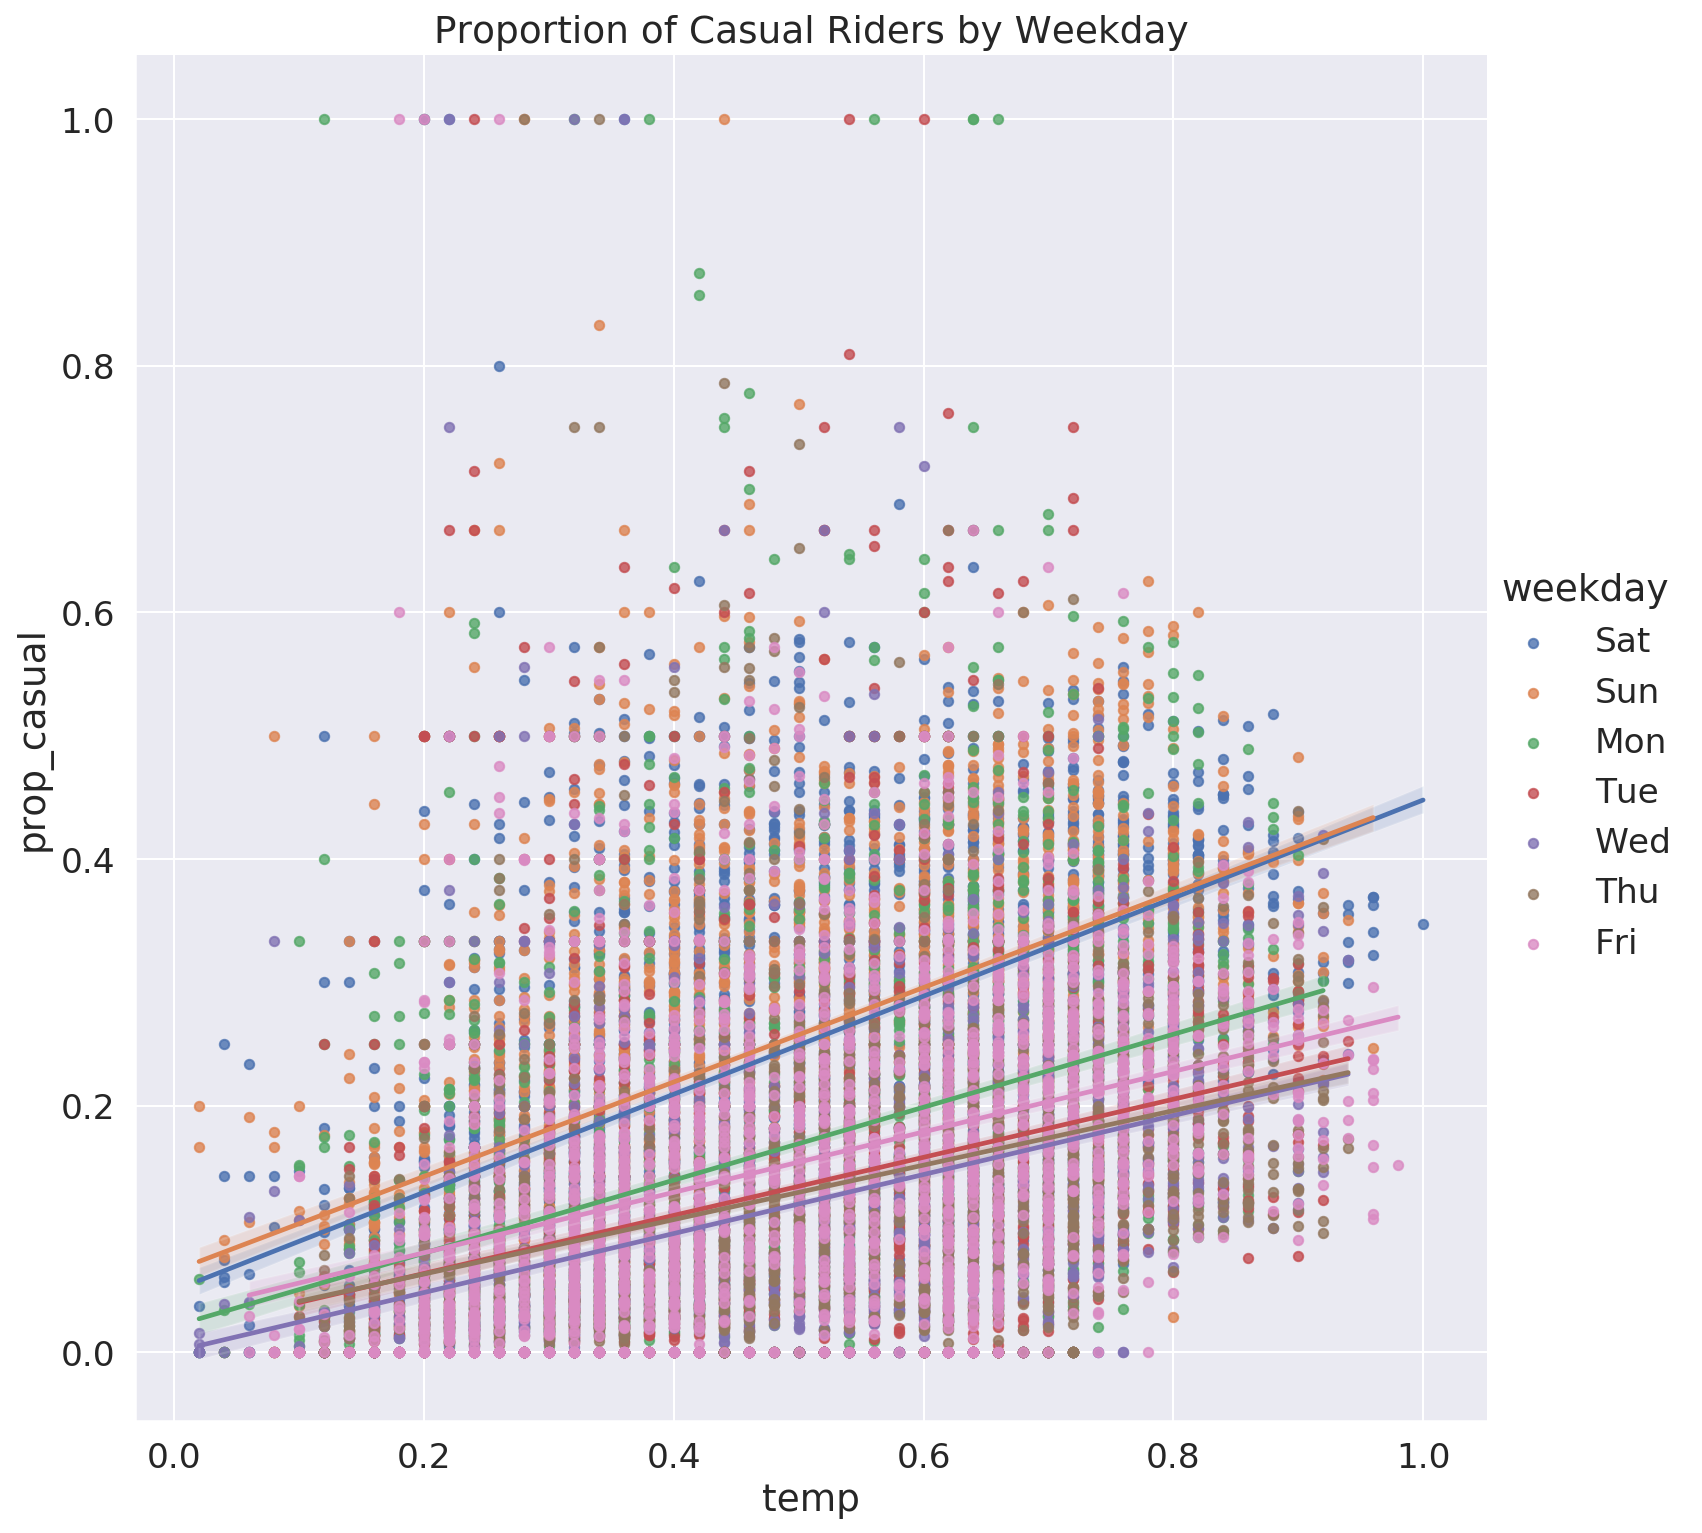

In [15]:
sns.lmplot(data=bikeshare_df, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

### 6b) Smoothed version of the proportion of casual riders

Text(0, 0.5, 'Casual Rider Proportion')

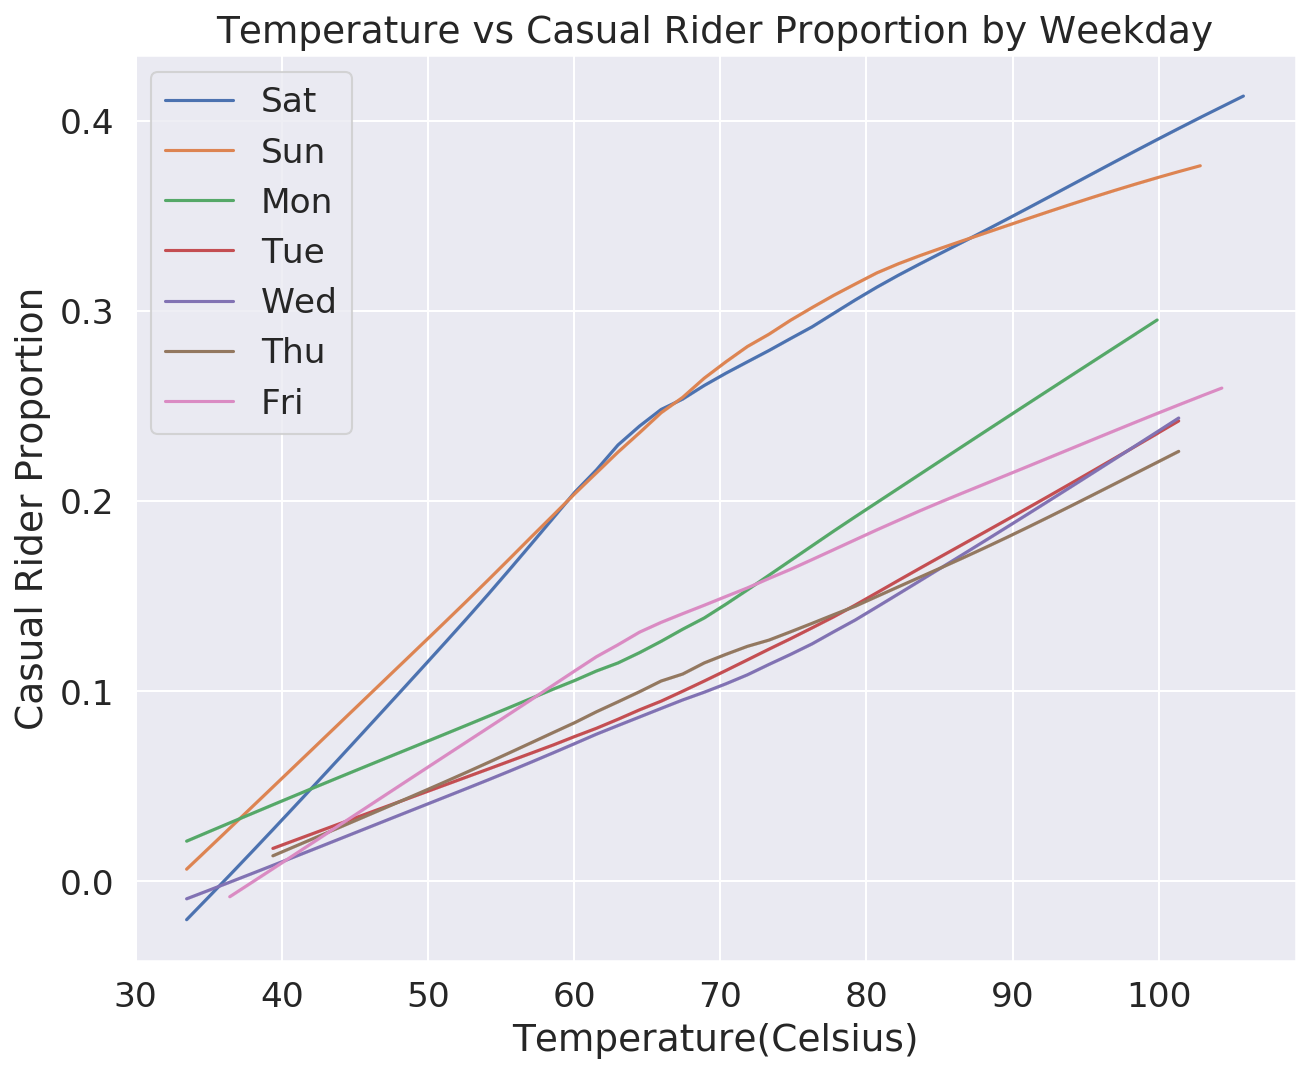

In [15]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(10,8))

for d in bikeshare_df['weekday'].unique():
    given_day = bikeshare_df[bikeshare_df['weekday'] == d].copy()
    given_day['temp'] = given_day['temp'] * 41 * 9 / 5 + 32 #convert to Fahrenheit
    ysmooth = lowess(given_day['prop_casual'], given_day['temp'], return_sorted=False)
    sns.lineplot(given_day['temp'], ysmooth, label=d)

plt.legend()
plt.title('Temperature vs Casual Rider Proportion by Weekday')
plt.xlabel('Temperature(Celsius)')
plt.ylabel('Casual Rider Proportion')

From the curve plot, we can see that there is a positive linear relationship between temperature and casual rider proportion for each weekday, meaning that as the temperature increases,casual rider proportion is also increasing. The casual rider proportion is higher with warmer temperatures. Saturday and Sunday are the days with the greatest casual rider proportions and Tuesday through Thursdays are the days with the lowest overall casual rider proportions. The weekdays also are indicative of more registered riders since there is a loweer casual rider proportion and the weekends have more casual than registered riders as the casual rider proportion is greater.